# Air Passengers Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
data = pd.read_csv('AirPassengers.csv',parse_dates = ['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
# check null values
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
data.describe()

,Month,#Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [5]:
data.rename(columns={'Month':'ds','#Passengers':'y'},inplace = True)

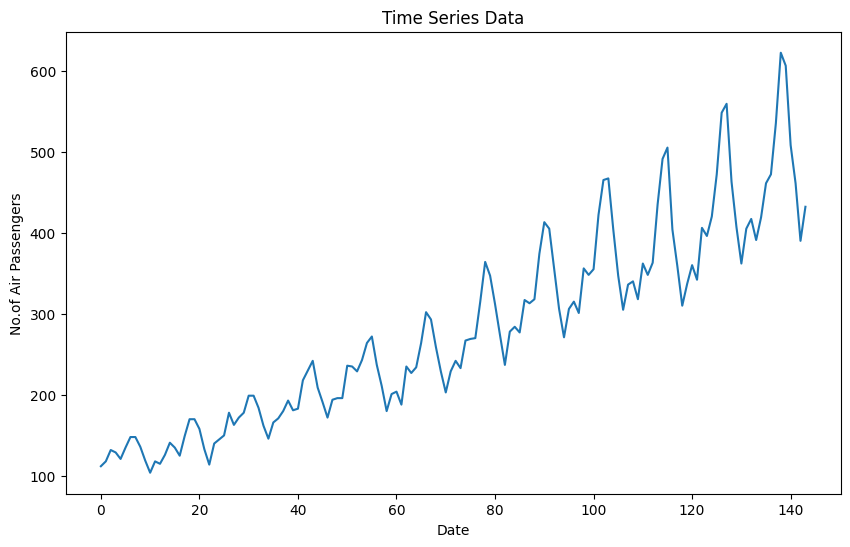

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data['y'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('No.of Air Passengers')
plt.show()

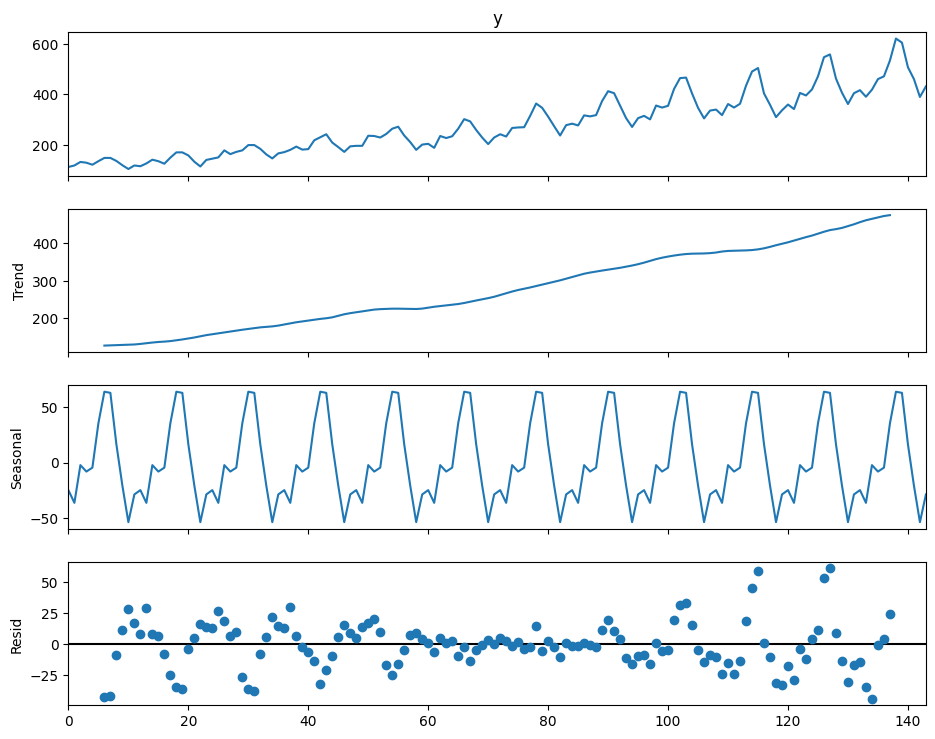

In [7]:
decompositon_air = seasonal_decompose(data['y'], model='additive',period=12)
fig = decompositon_air.plot()
fig.set_size_inches(10, 8)

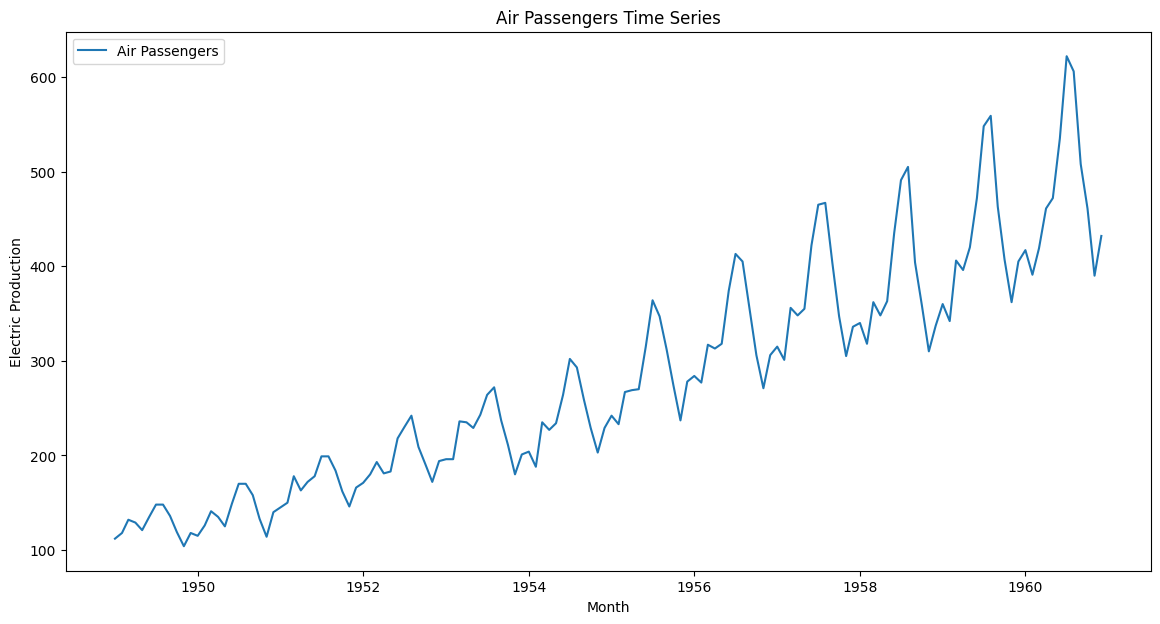

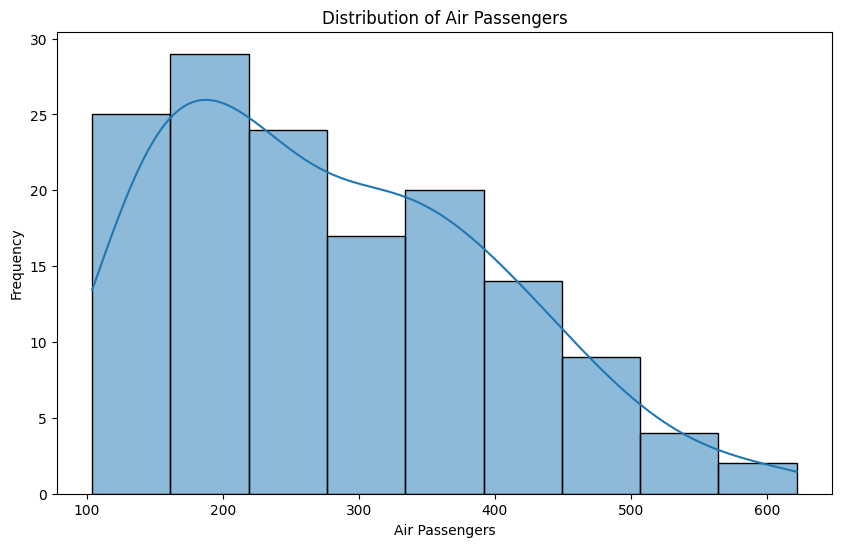

(0.577068234901525, -0.39377217091281036)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Convert the 'DATE' column to datetime format and set it as the index
df = data.copy()
df.set_index('ds', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df, label='Air Passengers')
plt.title('Air Passengers Time Series')
plt.xlabel('Month')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

# Check the distribution of the electric production values
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], kde=True)
plt.title('Distribution of Air Passengers')
plt.xlabel('Air Passengers')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis
electric_production_skewness = skew(df['y'])
electric_production_kurtosis = kurtosis(df['y'])

electric_production_skewness, electric_production_kurtosis

In [12]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [13]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['y'],test='adf')

0

# ADF Test

In [15]:
from statsmodels.tsa.stattools import adfuller
#  Perform ADF test
result = adfuller(data['y'])

# Extract and display the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [16]:
!pip install prophet

# Splitting the data into train and test sets for fitting on train and forecasting on Test set

In [20]:
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyaqf_ib/eezs_a_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyaqf_ib/ag7zgtb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90808', 'data', 'file=/tmp/tmpdyaqf_ib/eezs_a_5.json', 'init=/tmp/tmpdyaqf_ib/ag7zgtb2.json', 'output', 'file=/tmp/tmpdyaqf_ib/prophet_modelnhcdtuvh/prophet_model-20240723141405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


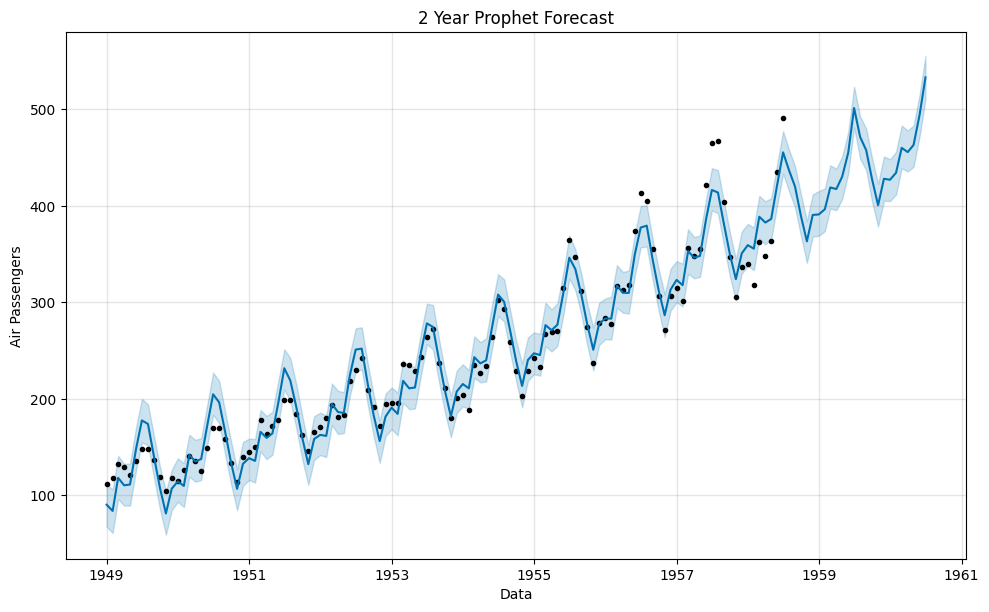

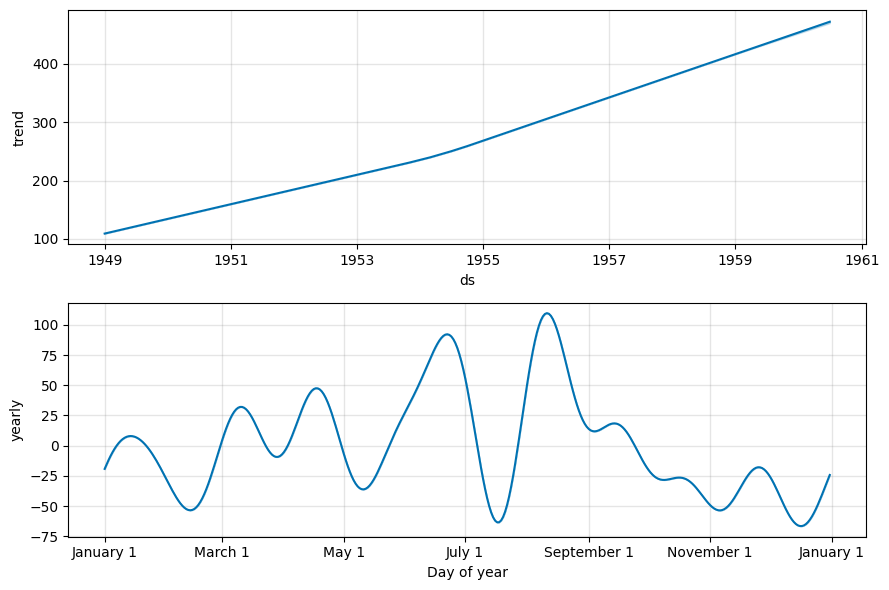

In [21]:
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
# Define and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)

# Create a DataFrame for future dates
# Create a dataframe for future dates (2 years ahead)
future = prophet_model.make_future_dataframe(periods=24, freq='M')
# future = prophet_model.make_future_dataframe(periods=365)
forecast_prophet = prophet_model.predict(future)

# Plot the forecast
fig = prophet_model.plot(forecast_prophet)
# plt.plot(test.index, test, label='Actual', color='red')
plt.xlabel('Data')
plt.ylabel('Air Passengers')
# plt.legend(['Train', 'Forecast', 'Test'])
plt.title('2 Year Prophet Forecast')
plt.show()

#Plot the components
fig = prophet_model.plot_components(forecast_prophet)
plt.show()

# Using pmdarima library which checks and gives the seasonal arima model with the best values of p,d,q and P,D,Q.

Number of differences needed: 0
Test Statistic            0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations Used     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.27 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.01 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.37 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.31 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.39 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.68 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.66

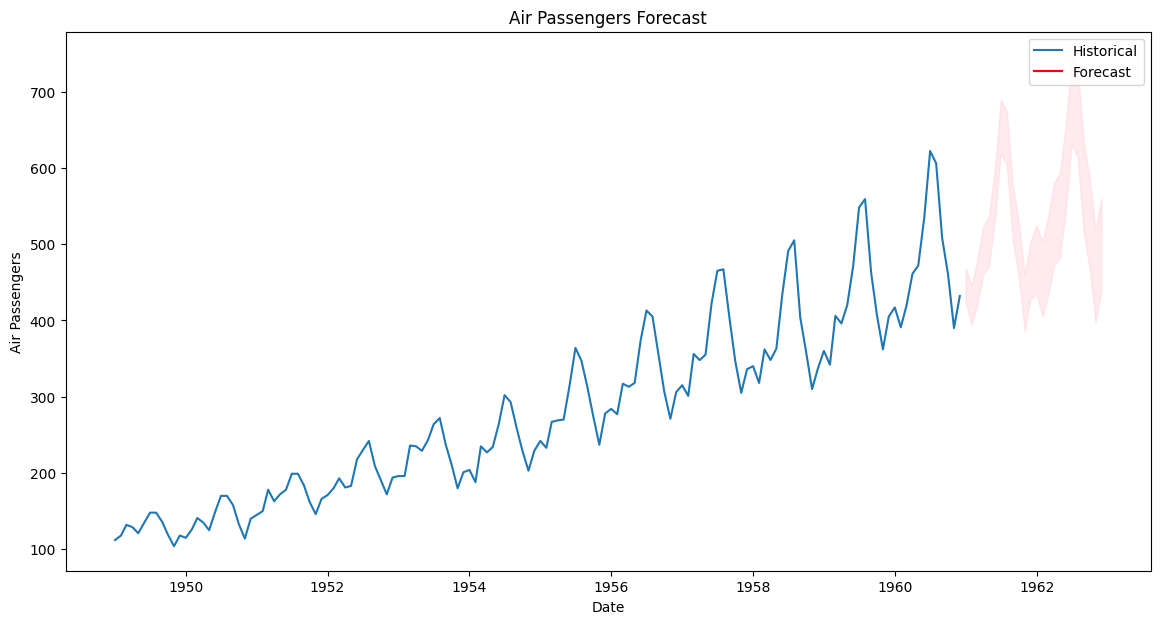

In [22]:
import pmdarima as pm

# Prepare the data for modeling
y = df['y']

# Determine the number of differences needed to make the time series stationary
from pmdarima.arima.utils import ndiffs
n_diffs = ndiffs(y, test='adf')
print(f'Number of differences needed: {n_diffs}')

# Difference the series if needed
if n_diffs > 0:
    y_diff = y.diff(n_diffs).dropna()
else:
    y_diff = y

# Check stationarity again
from statsmodels.tsa.stattools import adfuller
adf_test_diff = adfuller(y_diff)
adf_results_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_results_diff[f'Critical Value ({key})'] = value
print(adf_results_diff)

# Fit the ARIMA model
model = pm.auto_arima(y_diff, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast the next 24 months (2 years)
forecast, conf_int = model.predict(n_periods=24, return_conf_int=True)

# Create a new DataFrame for the forecast
forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y, label='Historical')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Air Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Air Passengers')
plt.legend()
plt.show()

# Prophet Model for Forcasting

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyaqf_ib/pf1m4k5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdyaqf_ib/1ar21myo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11149', 'data', 'file=/tmp/tmpdyaqf_ib/pf1m4k5z.json', 'init=/tmp/tmpdyaqf_ib/1ar21myo.json', 'output', 'file=/tmp/tmpdyaqf_ib/prophet_modela3ayor5s/prophet_model-20240723141431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


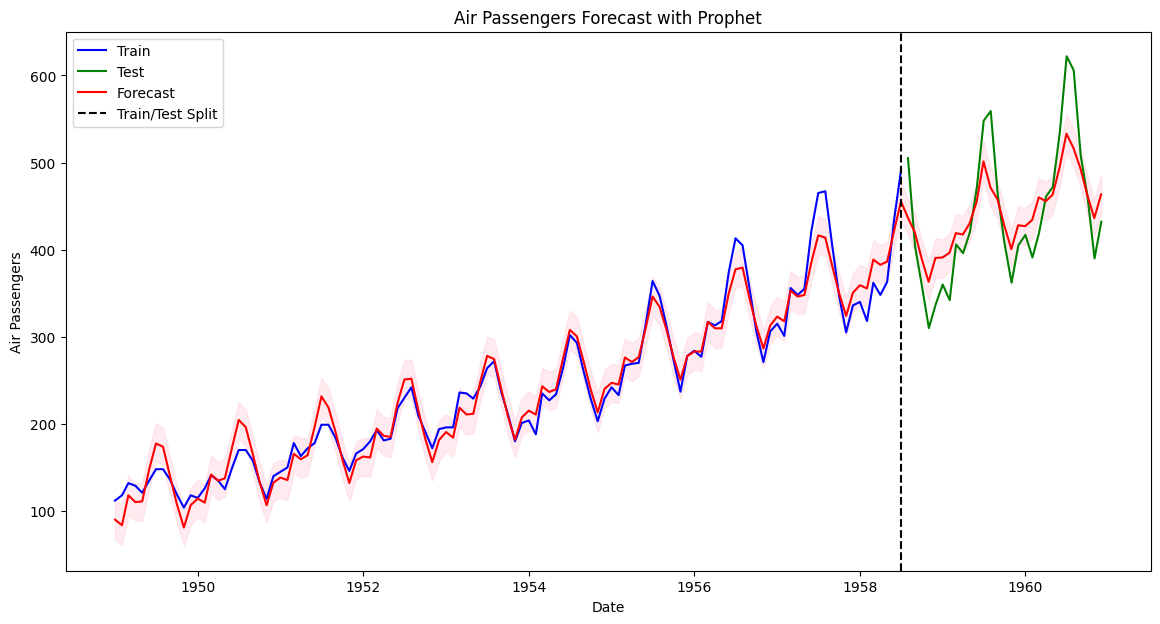

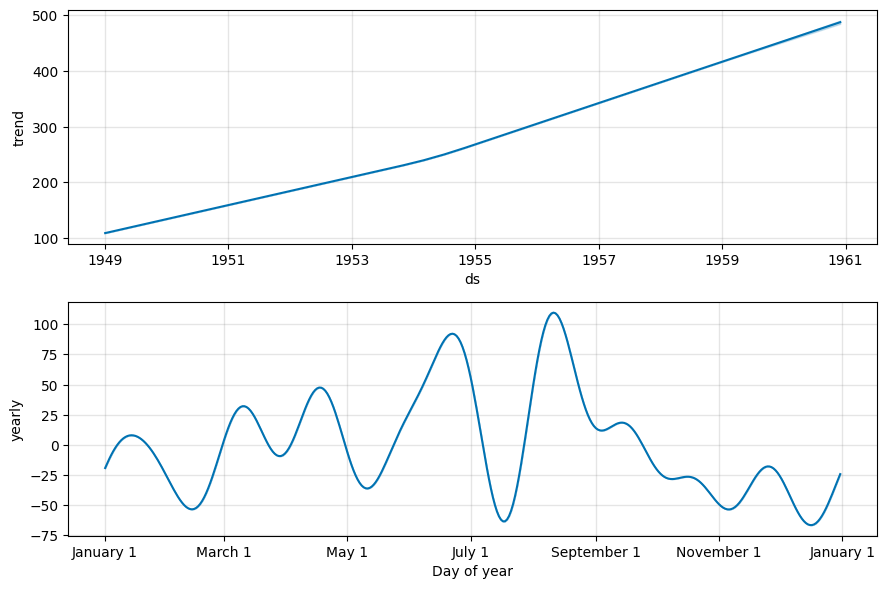

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
115,1958-07-31,400.675739,417.571546,458.925644,400.675178,400.677802,36.375438,36.375438,36.375438,36.375438,36.375438,36.375438,0.0,0.0,0.0,437.051177
116,1958-08-31,403.817424,398.144998,441.889827,403.789446,403.841474,16.233367,16.233367,16.233367,16.233367,16.233367,16.233367,0.0,0.0,0.0,420.050792
117,1958-09-30,406.857765,367.171174,411.738893,406.786801,406.921133,-16.944195,-16.944195,-16.944195,-16.944195,-16.944195,-16.944195,0.0,0.0,0.0,389.913570
118,1958-10-31,409.999450,341.738050,386.409121,409.880686,410.108819,-46.927348,-46.927348,-46.927348,-46.927348,-46.927348,-46.927348,0.0,0.0,0.0,363.072103
119,1958-11-30,413.039791,367.598949,413.224288,412.861930,413.209922,-22.563952,-22.563952,-22.563952,-22.563952,-22.563952,-22.563952,0.0,0.0,0.0,390.475840
120,1958-12-31,416.181477,367.327343,411.626121,415.935962,416.418527,-25.199784,-25.199784,-25.199784,-25.199784,-25.199784,-25.199784,0.0,0.0,0.0,390.981693
121,1959-01-31,419.323162,375.457485,418.341758,419.017497,419.628039,-22.956562,-22.956562,-22.956562,-22.956562,-22.956562,-22.956562,0.0,0.0,0.0,396.366601
122,1959-02-28,422.160814,397.896855,440.677886,421.779975,422.534533,-3.214005,-3.214005,-3.214005,-3.214005,-3.214005,-3.214005,0.0,0.0,0.0,418.946808
123,1959-03-31,425.302499,396.060595,439.144481,424.833900,425.750162,-7.953239,-7.953239,-7.953239,-7.953239,-7.953239,-7.953239,0.0,0.0,0.0,417.349260
124,1959-04-30,428.342840,409.478242,451.518215,427.772482,428.868308,1.859061,1.859061,1.859061,1.859061,1.859061,1.859061,0.0,0.0,0.0,430.201901


In [23]:
# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train)

# Create a dataframe for future dates (including the test period and 2 years ahead)
future = model.make_future_dataframe(periods=len(test), freq='M')

# Make forecast
forecast = model.predict(future)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train['ds'], train['y'], label='Train', color='blue')

# Plot test data
plt.plot(test['ds'], test['y'], label='Test', color='green')

# Plot forecasted values
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')

# Highlight the forecast period
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)

# Mark the train/test split
plt.axvline(x=train['ds'].iloc[-1], color='black', linestyle='--', label='Train/Test Split')

# Add titles and labels
plt.title('Air Passengers Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Air Passengers')
plt.legend()
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Extract the forecast for the test period and the next 2 years
forecast.tail(len(test))

In [24]:
# Calculate MSE
mse = mean_squared_error(test['y'], forecast['yhat'][len(train):])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1841.878304962096
